# Busqueda de relaciones de valores faltantes

In [1]:
%run precarga_datos_librerias.py
%run scripts/pandas_missing_extension.py

Probando la extension
      a    b
0     a  0.0
1     s  1.0
2  None  2.0
3  None  3.0
4  None  4.0
5     s  5.0
6     d  NaN
7     a  7.0
8     f  8.0
9     a  9.0
     Type  Streak
0      NA       2
1  Not NA       3
2  Not NA       5


/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:166: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:166: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:166: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:166: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_ext

## Matriz de sombras (shadow matrix)

Permite saber si ciertos valores faltantes presentes en una variable están correlacionados a los valores faltantes en otro.

1. Identifica todos tus valores faltantes. (Tabla original)
2. Reemplaza los valores faltantes con True (1) y False (1). (Matriz de sombras)
3. Reemplazar los True y False por algo más informativo. Añade el subfijo a los nombres de tus variables. (Nabular)

## Concepto y aplicación de la matriz de sombras.

### Construcción de la matriz de sombras

In [2]:
( # Matriz de sombras
    riskfactors
    .isna()
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [3]:
( # Nabular
    riskfactors
    .isna()
    .replace({
        False: "Not_missing",
        True: "Missing",
    })
    .add_suffix("_NA") # Añade subfijo a cada columna
    .pipe(
        lambda nabular: pd.concat(
            [riskfactors, nabular],
            axis="columns"
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not_missing,Missing,Missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not_missing,Missing,Missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not_missing,Missing,Missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not_missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not_missing,Not_missing,Not_missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not_missing,Missing,Missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not_missing,Missing,Missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not_missing,Not_missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not_missing,Not_missing,Not_missing,Missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing,Not_missing


### Automatizar con la API de pandas.

In [4]:
riskfactors.missing.bind_shadow_matrix()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not_NA,NA,NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not_NA,NA,NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not_NA,NA,NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not_NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not_NA,Not_NA,Not_NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not_NA,NA,NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not_NA,NA,NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not_NA,Not_NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not_NA,Not_NA,Not_NA,NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA,Not_NA


### Explorar estadísticos usando las nuevas columnas de la matriz de sombras.

In [7]:
# Comparando los estadísticos de la variable edad dividida por 
# la perdida o no del valor weight_lbs_NA
( 
    riskfactors
    .missing.bind_shadow_matrix()
    .groupby(["weight_lbs_NA"])
    ["age"]
    .describe()
)

,count,mean,std,min,25%,50%,75%,max
weight_lbs_NA,,,,,,,,
NA,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
Not_NA,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


Quizas, o quizas no, la diferencia sea significativa entre ambos valores, depende de pruebas estadísticas, sin embargo es a partir de aquí que ya se puede empezar a hacer preguntas entre variables del grupo del que se tienen observaciones, que del grupo del que no se tienen observaciones.

Sería posible, por ejemplo, que no se registrara el peso de personas de cierta edad.

## Visualización de la matriz de sombras.

<Axes: xlabel='weight_lbs_NA', ylabel='age'>

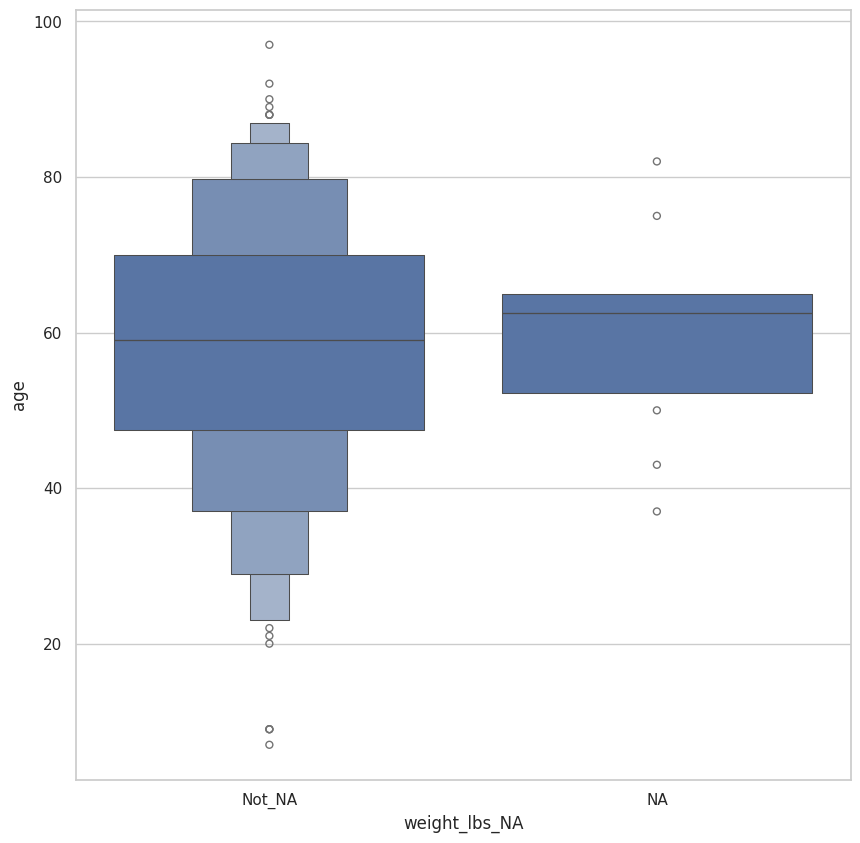

In [8]:
(
    riskfactors.missing.bind_shadow_matrix()
    .pipe(
        lambda df: (
            sns.boxenplot(
                data=df,
                x="weight_lbs_NA",
                y="age"
            )
        )
    )
)

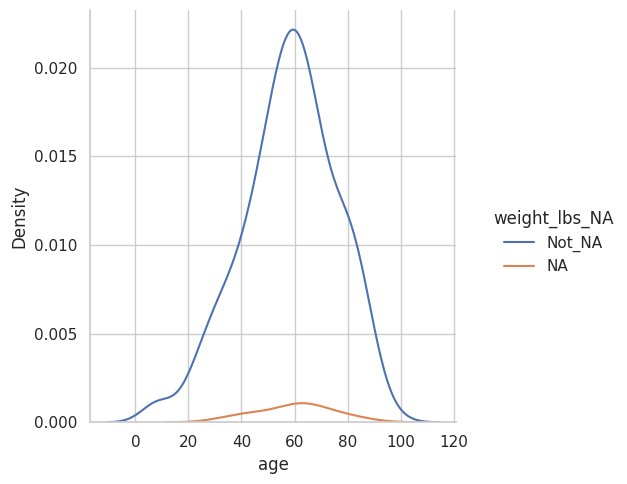

In [12]:
(
    riskfactors.missing.bind_shadow_matrix()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                hue="weight_lbs_NA",
                kind="kde"
            )
        )
    )
)

Distribución de densidad de los pesos, se observa la repetición de valores NA justo donde hay más registro de valores en primer lugar.

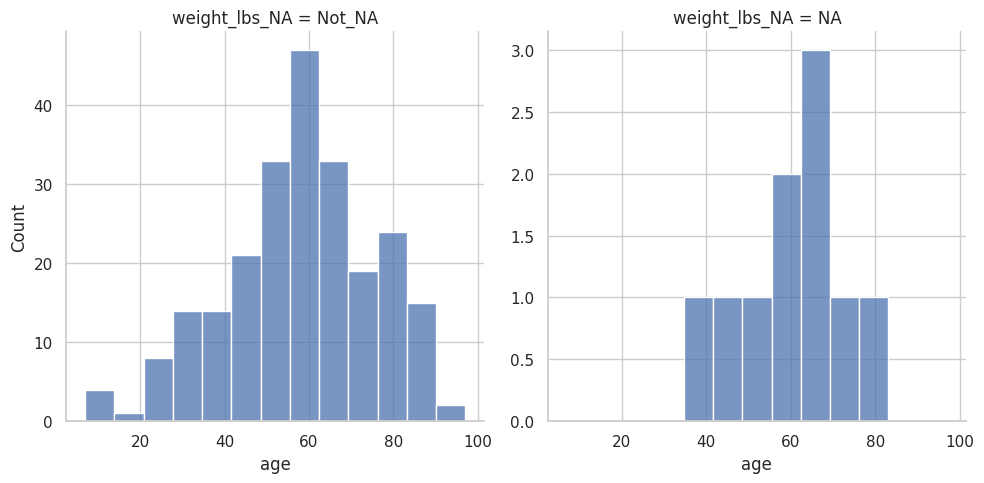

In [15]:
(
    riskfactors.missing.bind_shadow_matrix()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                col="weight_lbs_NA",
                facet_kws={
                    "sharey": False
                }
            )
        )
    )
)

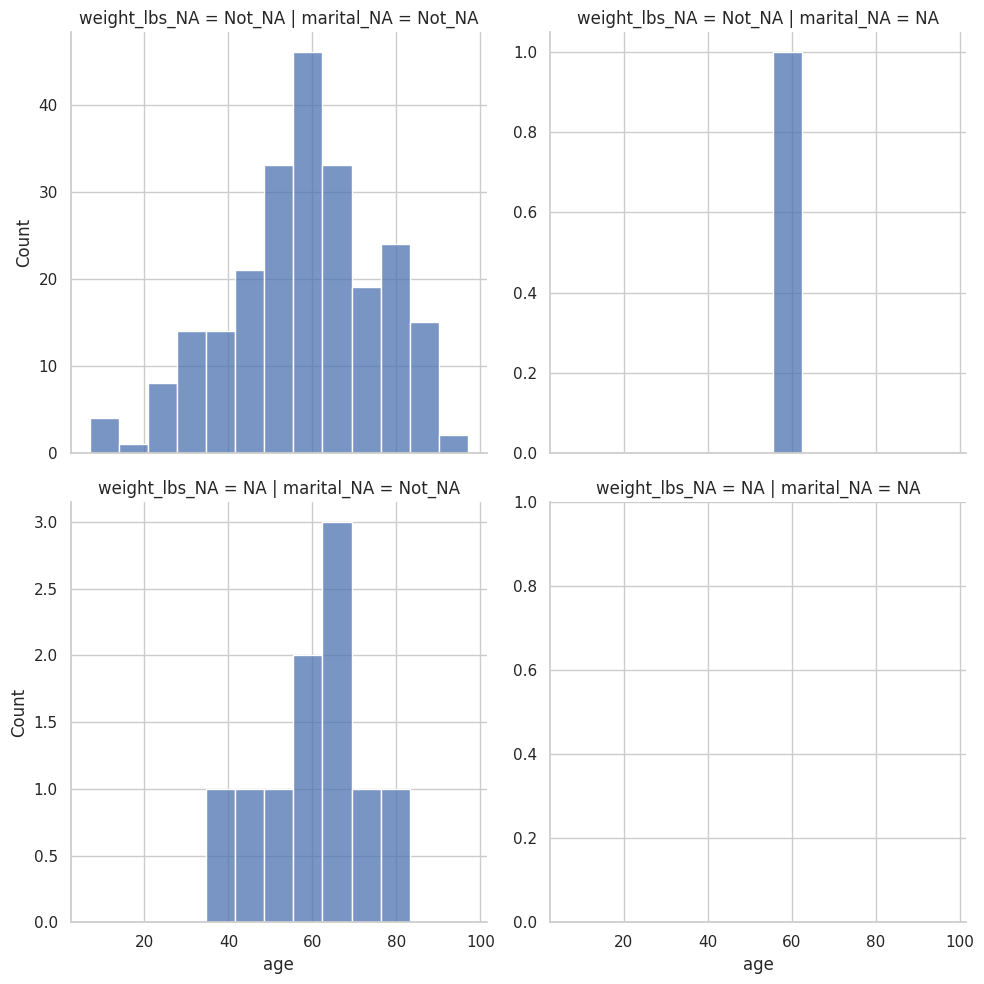

In [18]:
(
    riskfactors.missing.bind_shadow_matrix()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                col="marital_NA",
                row="weight_lbs_NA",
                facet_kws={
                    "sharey": False
                }
            )
        )
    )
)

No existen edades para los casos en los que nosotros tenemos casos faltantes de peso y edad.